In [4]:
!pip install yfinance
!pip install matplotlib


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------- -------------------------- 1.0/3.0 MB 5.6 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 5.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 5.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.6 MB 6.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/12.6 MB 5.8 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.6 MB 6.1 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.6 MB 5.8 MB/s

# Question 1 - Extracting Tesla Stock Data Using yfinance


In [18]:
import yfinance as yf

In [20]:
tesla = yf.Ticker("TSLA")

In [24]:
tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue 

In [90]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Petición a la página
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Buscamos todas las tablas
tables = soup.find_all("table")

# Encontramos la tabla que tiene "Tesla Quarterly Revenue" en el texto anterior
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        revenue_table = table
        break
else:
    raise ValueError("No se encontró la tabla con los ingresos de Tesla.")

# Extraemos las filas
rows = revenue_table.find_all("tr")

# Creamos listas vacías
dates = []
revenues = []

# Procesamos las filas
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            dates.append(date)
            revenues.append(float(revenue))

# Creamos el DataFrame
tesla_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue (in millions USD)": revenues
})

# Mostramos las últimas 5 filas
print(tesla_revenue.tail())

          Date  Revenue (in millions USD)
57  2010-09-30                       31.0
58  2010-06-30                       28.0
59  2010-03-31                       21.0
60  2009-09-30                       46.0
61  2009-06-30                       27.0


# Question 3: Use yfinance to Extract Stock Data


In [92]:
import yfinance as yf
import pandas as pd


gme = yf.Ticker("GME")


gme_data = gme.history(period="max")


gme_data.reset_index(inplace=True)

print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Question 4: Use Webscraping to Extract GME Revenue Data

In [96]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"


headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")


tables = soup.find_all("table")


for table in tables:
    if "GameStop Quarterly Revenue" in table.get_text():
        revenue_table = table
        break
else:
    raise ValueError("No se encontró la tabla con los ingresos de GME.")


rows = revenue_table.find_all("tr")


dates = []
revenues = []

for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            dates.append(date)
            revenues.append(float(revenue))


gme_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue (in millions USD)": revenues
})


print(gme_revenue.tail())

          Date  Revenue (in millions USD)
60  2010-01-31                     3524.0
61  2009-10-31                     1835.0
62  2009-07-31                     1739.0
63  2009-04-30                     1981.0
64  2009-01-31                     3492.0


In [106]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

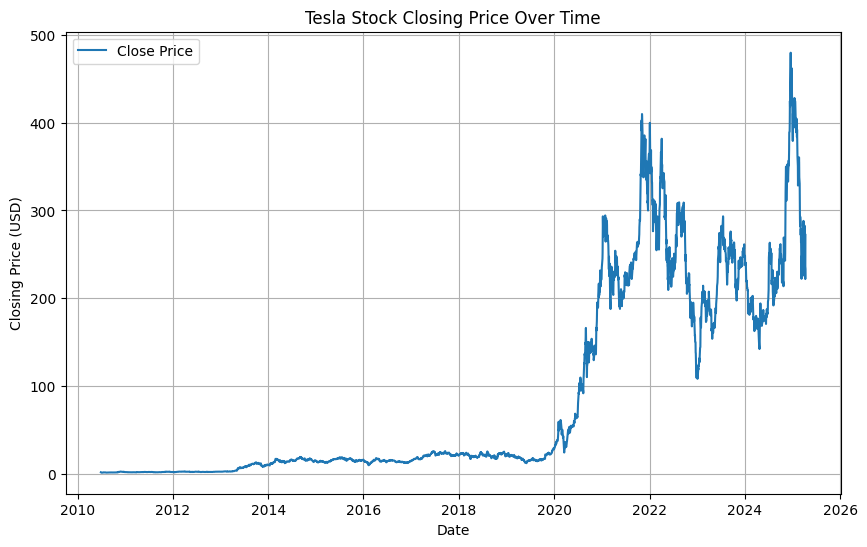

In [108]:
import yfinance as yf
import pandas as pd

# Descargar datos históricos de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Graficar usando la función
make_graph(tesla_data, "Tesla Stock Closing Price Over Time")

# Question 6: Plot GameStop Stock Graph


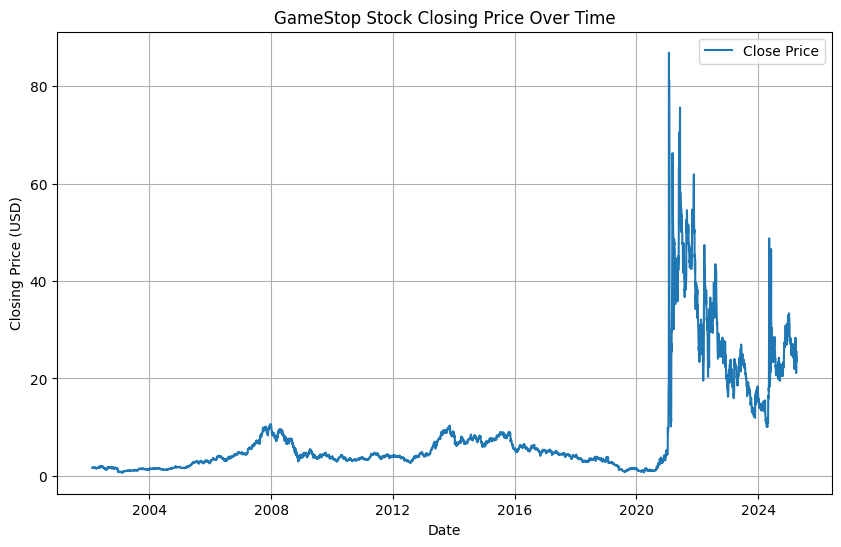

In [111]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

make_graph(gme_data, "GameStop Stock Closing Price Over Time")